In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load the dataset

mnist = tf.keras.datasets.mnist

In [3]:
# Split the data into training/test

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Creating the architecture for the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 3s 1ms/step - loss: 1.6038 - accuracy: 0.8755
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9347
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1958 - accuracy: 0.9470
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1671 - accuracy: 0.9536
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1512 - accuracy: 0.9581
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1340 - accuracy: 0.9625
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1229 - accuracy: 0.9655
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1116 - accuracy: 0.9696
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1017 - accuracy: 0.9722
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0

In [7]:
# evaluate model performance

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {loss:.5f}")
print(f"Accuracy: {accuracy:.5f}")


313/313 [==============================] - 0s 754us/step - loss: 0.1542 - accuracy: 0.9658
Loss: 0.15420
Accuracy: 0.96580


1/1 [==============================] - 0s 63ms/step
This digit is likely a 8


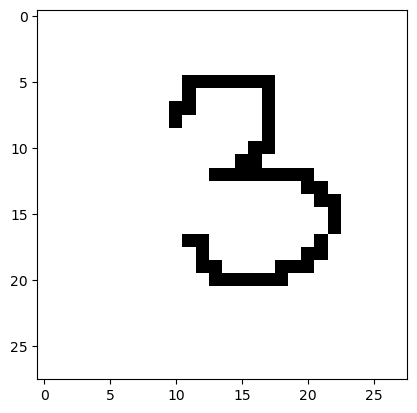

1/1 [==============================] - 0s 16ms/step
This digit is likely a 7


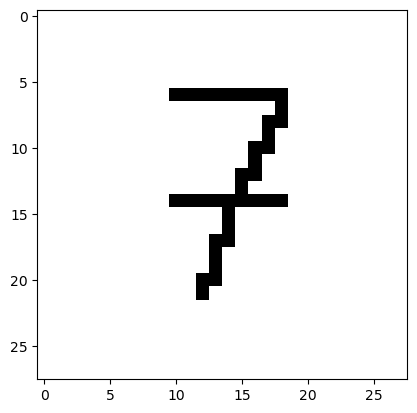

1/1 [==============================] - 0s 16ms/step
This digit is likely a 8


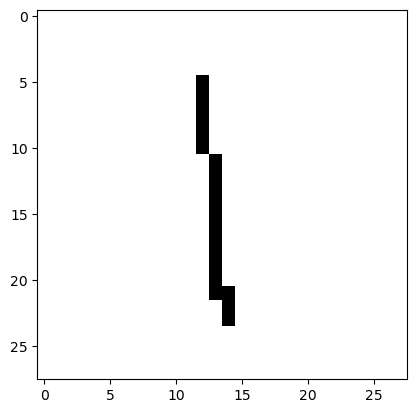

1/1 [==============================] - 0s 16ms/step
This digit is likely a 8


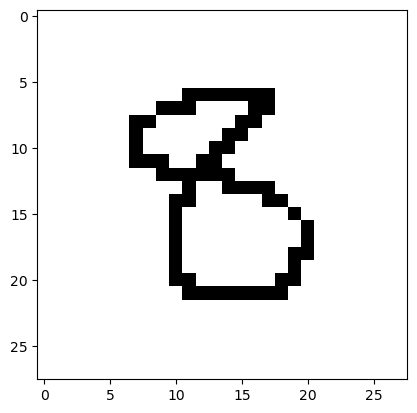

1/1 [==============================] - 0s 22ms/step
This digit is likely a 5


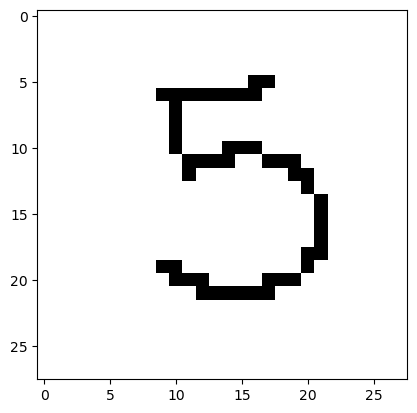

1/1 [==============================] - 0s 16ms/step
This digit is likely a 4


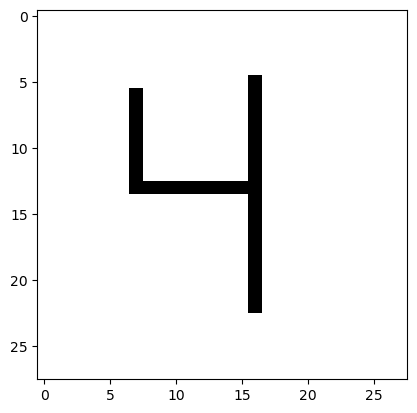

1/1 [==============================] - 0s 0s/step
This digit is likely a 4


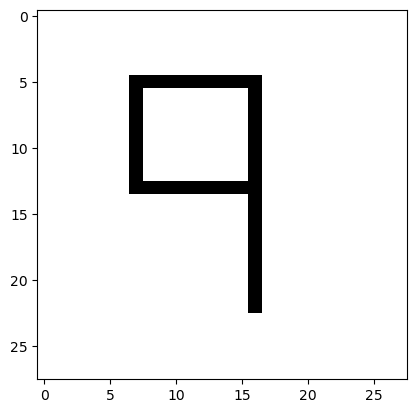

1/1 [==============================] - 0s 16ms/step
This digit is likely a 9


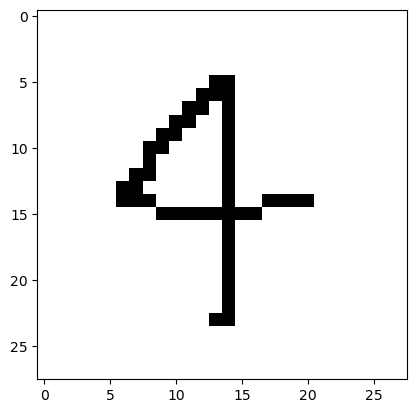

1/1 [==============================] - 0s 16ms/step
This digit is likely a 2


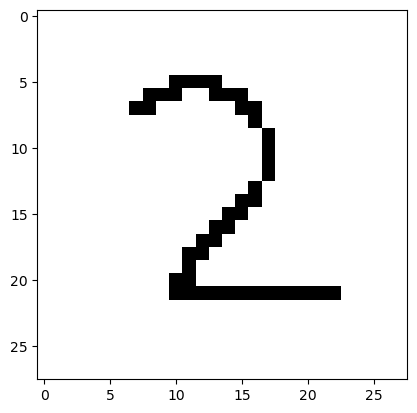

1/1 [==============================] - 0s 16ms/step
This digit is likely a 6


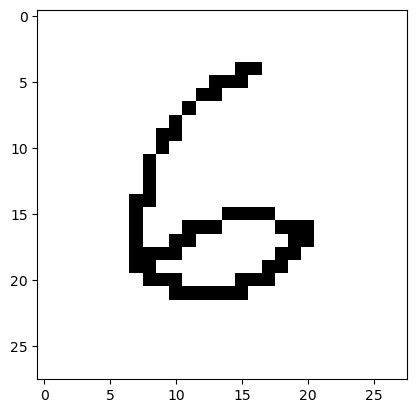

In [8]:
# Testing self-created digits using paint application

index = 1

while os.path.isfile(f"Desktop/custom_digits/digit{index}.png"):
    try:
        img = cv2.imread(f"Desktop/custom_digits/digit{index}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is likely a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        #img = mpimg.imread(f"digit{index}")
        #imgplot = plt.imshow(img)
        #plt.show()
        
    except:
        print("Something went wrong.")
    finally:
        index += 1